In [14]:
import pandas as pd
import numpy as np
import subprocess
import pysam
import csv
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

samCols=['nm','flag','seqid','start','qual','cigar','rn','pn','len']

In [13]:
df=pd.read_csv("./outSpleen/al_stats.csv")
df['t']=(df["new_al_pair"]+df["new_al_single"])
df['t2']=df['t']/df["total"]
df.sort_values(by='t2',ascending=False,inplace=True)
df

,name,total,old_secondary,old_al_pair,old_al_single,oldAlRate,new_secondary,new_al_pair,new_al_single,newAlRate,t,t2
55,SRR1345782,70984290,8847173,63230544,3029551,0.9334,1906140,69648855,3290125,1.0275,72938980,1.027537
103,SRR1456991,80754918,11773112,72653404,3318938,0.9407,2320014,79575049,3352322,1.0269,82927371,1.026902
98,SRR1443483,66394466,8635771,58880230,2818305,0.9292,1791824,64995810,2948534,1.0233,67944344,1.023343
46,SRR1327279,70724816,10279838,62226496,3193902,0.9249,2140446,69027206,3316243,1.0228,72343449,1.022886
74,SRR1391961,77069844,15014367,68337208,3400232,0.9308,2616733,74846737,3936861,1.0222,78783598,1.022236
45,SRR1326225,59605222,14976409,50777842,3220009,0.9059,2840997,56982185,3908635,1.0215,60890820,1.021569
113,SRR1480587,144619598,24388549,128403402,6063018,0.9297,5084778,140859324,6752037,1.0206,147611361,1.020687
66,SRR1370495,99471650,12342490,90225270,3600496,0.9432,2732617,97630661,3754801,1.0192,101385462,1.019240
89,SRR1418145,65167348,8661801,58396004,2561866,0.9354,1540993,63899600,2376423,1.0170,66276023,1.017013
16,SRR1085039,67394260,8364082,60786374,2572798,0.9401,1654609,66037195,2482458,1.0166,68519653,1.016699


In [9]:
df=pd.read_csv("./outSpleen/al_stats_py.csv")
df['t2']=df['newAligned']/df["total"]
df.sort_values(by='t2',ascending=False,inplace=True)
df

,name,total,old_secondary,oldAligned,oldAlRate,new_secondary,newAligned,newAlRate,t2
55,SRR1345782_2,0,NaN,0,NaN,44112094,65639997,NaN,inf
5,SRR1073947,79794008,10428437.0,75368803,0.9445,45370699,77880491,0.9760,0.976019
10,SRR1077944,64087816,8760338.0,60194632,0.9392,36272884,62505820,0.9753,0.975315
21,SRR1089230,61955192,7342237.0,58419083,0.9429,34970157,60417742,0.9751,0.975184
8,SRR1076369,79150856,10994656.0,74465459,0.9408,45702494,77049827,0.9734,0.973455
29,SRR1095549,60838936,8242067.0,57034713,0.9374,35000203,59219221,0.9733,0.973377
67,SRR1370495,99471650,12342490.0,93825766,0.9432,58762497,96793892,0.9730,0.973080
104,SRR1456991,80754918,11773112.0,75972342,0.9407,48674415,78548670,0.9726,0.972680
90,SRR1418145,65167348,8661801.0,60957870,0.9354,38020088,63361800,0.9722,0.972294
51,SRR1335875,91238508,13581214.0,85416556,0.9361,52044475,88685430,0.9720,0.972018


In [36]:
df=df[~(df["name"].isin(["SRR1345782","SRR1345782_2"]))].reset_index(drop=True)
df["diff"]=(df["newAlRate"]-df["oldAlRate"])*100
df.sort_values(by="diff",ascending=False)

,name,total,old_secondary,oldAligned,oldAlRate,new_secondary,newAligned,newAlRate,t2,diff
115,SRR1477057,91350246,14193581.0,76667164,0.8392,50747365,84080355,0.9204,0.920417,8.12
118,SRR2135309,1808876,43212.0,876394,0.4844,599518,1013732,0.5604,0.560421,7.60
109,SRR1477363,77734666,8629179.0,67489486,0.8682,42864138,73156620,0.9411,0.941107,7.29
116,SRR1311980,86472848,9953040.0,72887254,0.8428,49604875,79027820,0.9139,0.913903,7.11
117,SRR2135389,1503728,46778.0,742123,0.4935,494311,846260,0.5627,0.562775,6.92
112,SRR1407336,92541782,12348835.0,80399771,0.8687,51492510,86676633,0.9366,0.936622,6.79
114,SRR1436740,103196938,13477604.0,89541508,0.8676,56396647,96489493,0.9350,0.935003,6.74
113,SRR1444156,108824774,38576468.0,94459036,0.8679,65805313,101774240,0.9352,0.935212,6.73
111,SRR1323788,81043194,10130457.0,70636538,0.8715,44649943,75949771,0.9371,0.937152,6.56
110,SRR1344060,71614348,10571344.0,62684782,0.8753,41061421,67285573,0.9395,0.939554,6.42


/home/sparrow/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


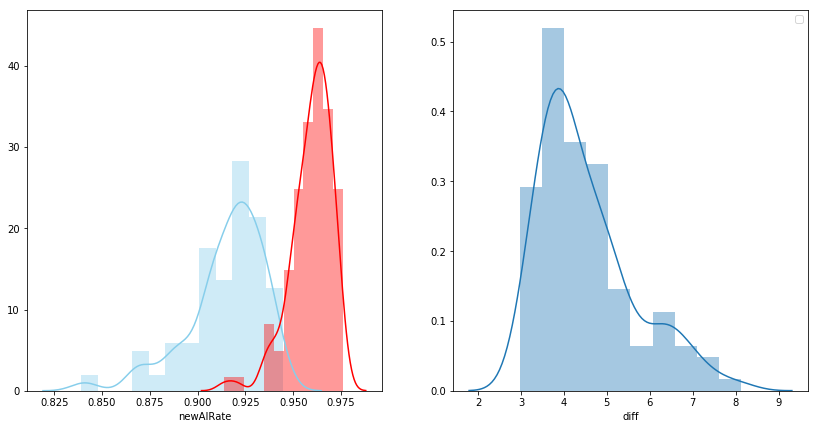

In [35]:
f, ax = plt.subplots(1,2,figsize=(14, 7))
sns.distplot(df[df["oldAlRate"]>0.8]["oldAlRate"] , color="skyblue", label="HISAT2",ax=ax[0])
sns.distplot(df[df["oldAlRate"]>0.8]["newAlRate"] , color="red", label="transHISAT2",ax=ax[0])
sns.distplot(df["diff"],ax=ax[1])
plt.legend()

In [10]:
df[df['oldAlRate']>=df['newAlRate']]

,name,total,old_secondary,old_al_pair,old_al_single,oldAlRate,new_secondary,new_al_pair,new_al_single,newAlRate,t,t2
